In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utils.paths as path
import utils.data_cleaning
import missingno

In [95]:
data_dir = path.make_dir_function('data')

In [96]:
df_hurtos = pd.read_csv(data_dir('pre_process','hurtos.csv'),sep=',')
#nuevo df sin columnas innecesarias
df = df_hurtos.copy()
df.drop(['DIRECTORIO', 'NRO_ENCUESTA', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P',
       'ORDEN', 'FEX_C','municipio'],axis=1,inplace=True)

In [97]:
df.shape

(16256, 24)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16256 entries, 0 to 16255
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   mes_ultimo_unico_robo      16256 non-null  object
 1   metodo                     16256 non-null  object
 2   hora                       16111 non-null  object
 3   lugar                      16256 non-null  object
 4   celular                    16256 non-null  object
 5   efectivo_tarjetas          16256 non-null  object
 6   articulos_de_uso_personal  16256 non-null  object
 7   dispositivos               16256 non-null  object
 8   otra_pertenencia           16256 non-null  object
 9   arma_fuego                 13884 non-null  object
 10  arma_blanca                13884 non-null  object
 11  otros_objetos              13884 non-null  object
 12  fuerza_fisica              13884 non-null  object
 13  drogas_sustancias          13884 non-null  object
 14  hizo_l

# Valores faltantes

In [99]:
#numero de valores faltantes
df.ms_tools.number_missing()

78613

### ¿Qué valores faltantes tenemos por cada columna?

In [100]:
df.isnull().sum()

mes_ultimo_unico_robo            0
metodo                           0
hora                           145
lugar                            0
celular                          0
efectivo_tarjetas                0
articulos_de_uso_personal        0
dispositivos                     0
otra_pertenencia                 0
arma_fuego                    2372
arma_blanca                   2372
otros_objetos                 2372
fuerza_fisica                 2372
drogas_sustancias             2372
hizo_llamada                     0
denuncia                         0
lugar_denuncia               11116
autoridad                    11819
razon_denuncia               11116
buena_atencion               12655
razon_de_satisfaccion        14762
razon_no_denuncia             5140
recuperacion_objeto              0
year                             0
dtype: int64

In [101]:
df.ms_tools.table_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,mes_ultimo_unico_robo,0,16256,0.000000
1,metodo,0,16256,0.000000
2,hora,145,16256,0.891978
3,lugar,0,16256,0.000000
4,celular,0,16256,0.000000
5,efectivo_tarjetas,0,16256,0.000000
6,articulos_de_uso_personal,0,16256,0.000000
7,dispositivos,0,16256,0.000000
8,otra_pertenencia,0,16256,0.000000
9,arma_fuego,2372,16256,14.591535


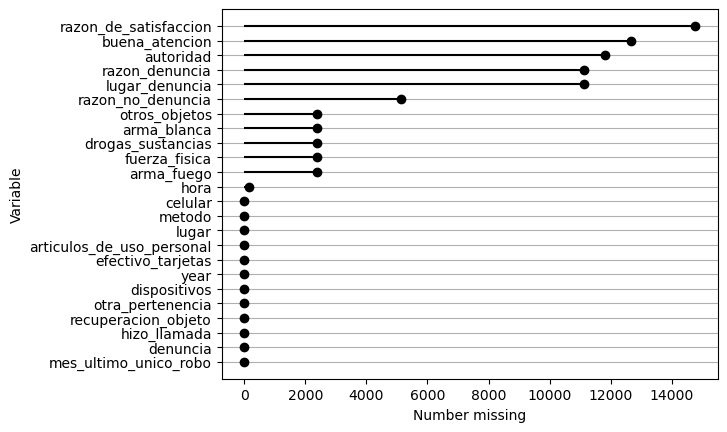

In [102]:
df.ms_tools.vis_variable_plot()

#### Con que lo amenazaron en el robo

In [103]:
#df.ms_tools.table_variable_joint()

In [104]:
# df.ms_tools.vis_upsetplot(
#     variables=['arma_fuego', 'arma_blanca', 'otros_objetos',
#        'fuerza_fisica', 'drogas_sustancias'],
#     element_size=30
# )
# plt.show()

In [105]:
#df.ms_tools.table_case_joint()

## ¿Qué razones pueden haber para que hayan valores faltantes?

<AxesSubplot: >

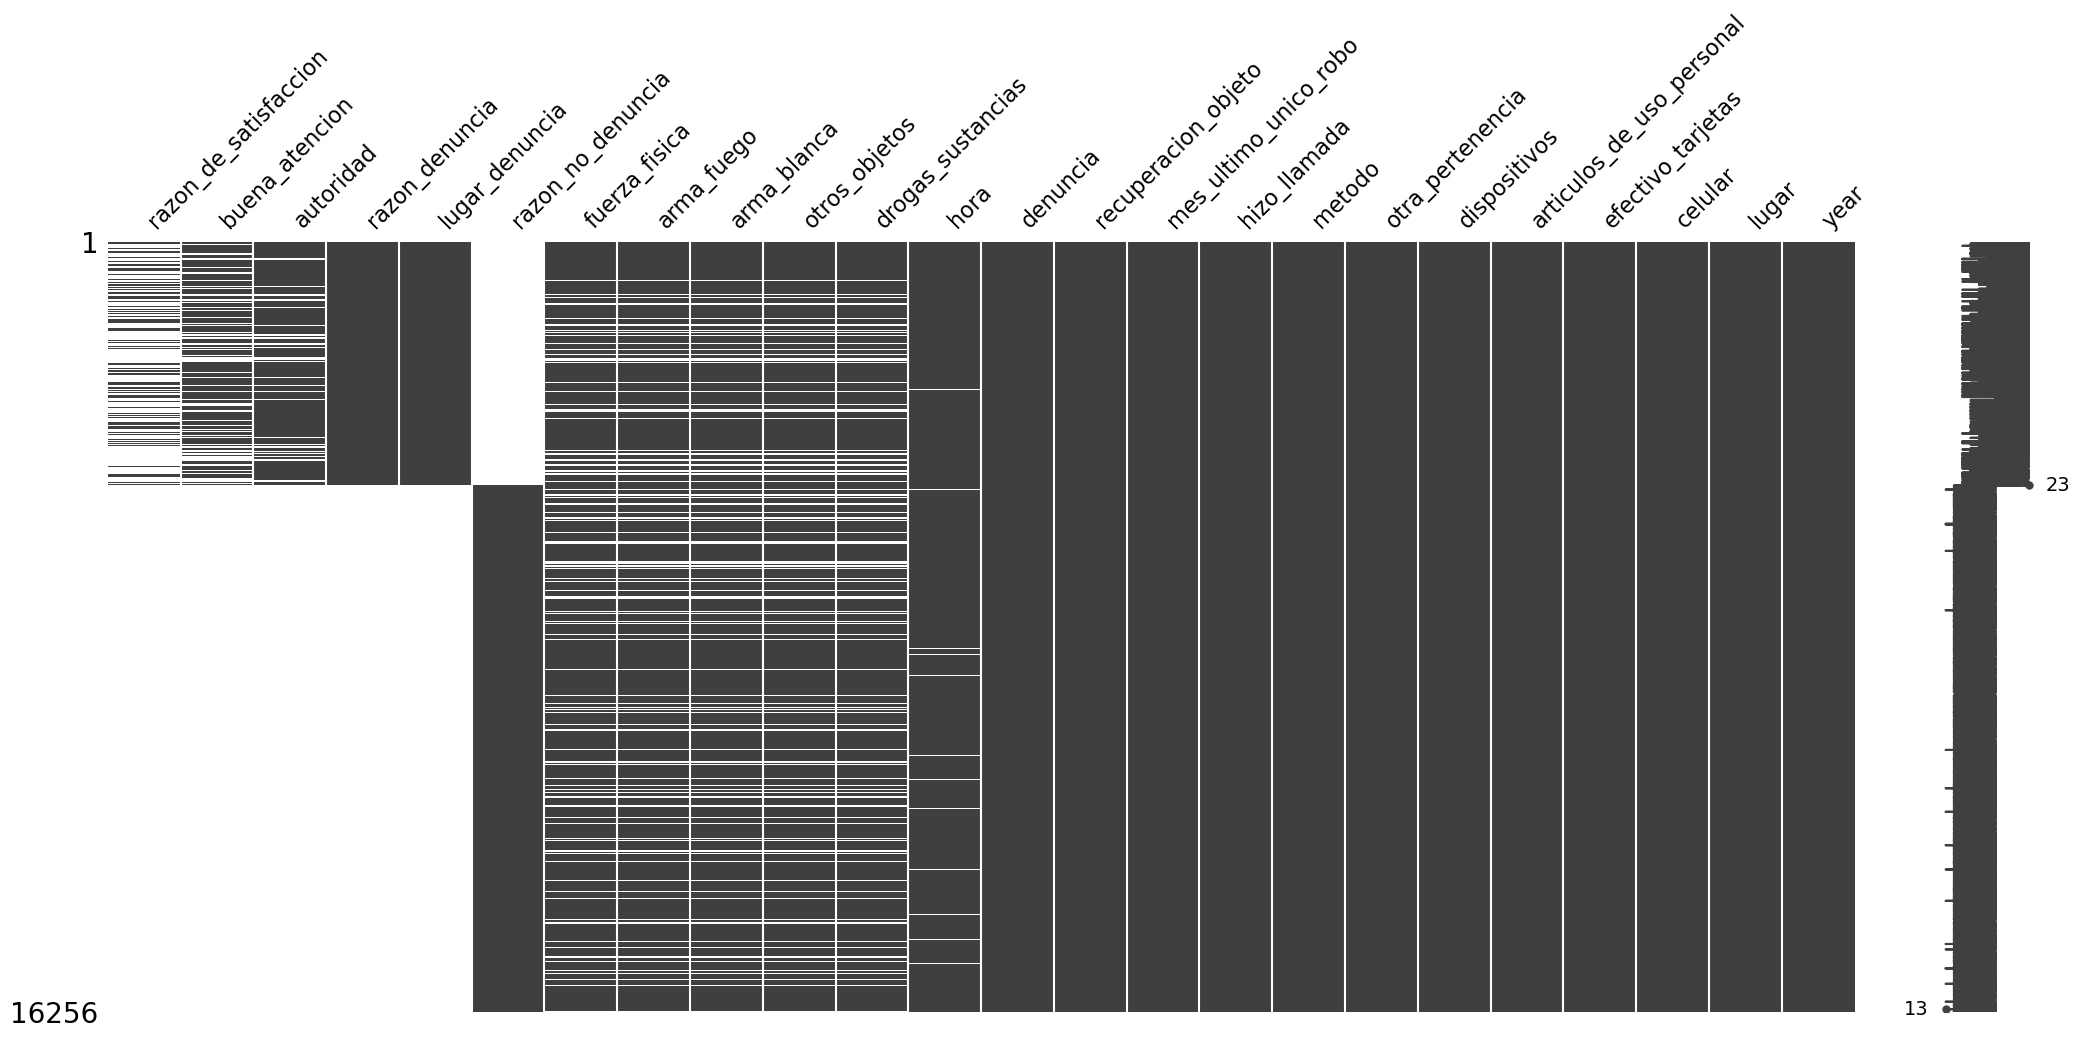

In [106]:
(
    df
    .ms_tools.sort_variables_by_missingness()
    .sort_values(by='razon_denuncia')
    .pipe(missingno.matrix)
)

### Nota:
al hacer la anterior clasificacion caí en cuenta que, la falta de tantos valores nulos
dependía de si la persona hizo o no la denuncia.

por consiguiente procedo a separar las personas que denunciaron y las que no

In [107]:
df_si_denuncia = df[df['denuncia']=='si']
df_no_denuncia = df[df['denuncia']=='no']

### Valores faltantes en personas que no denunciaron

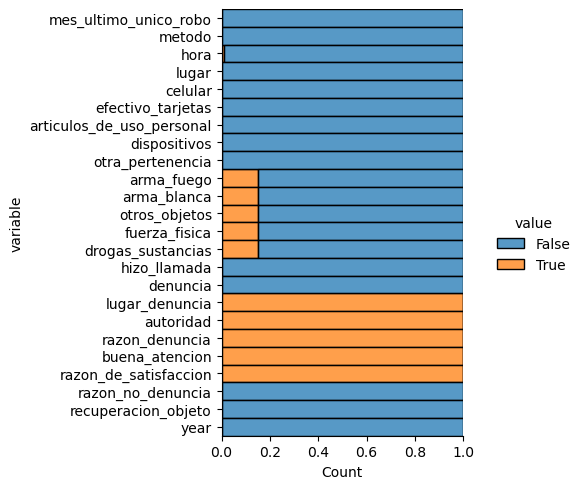

In [108]:
df_no_denuncia.ms_tools.vis_proportion()

<AxesSubplot: >

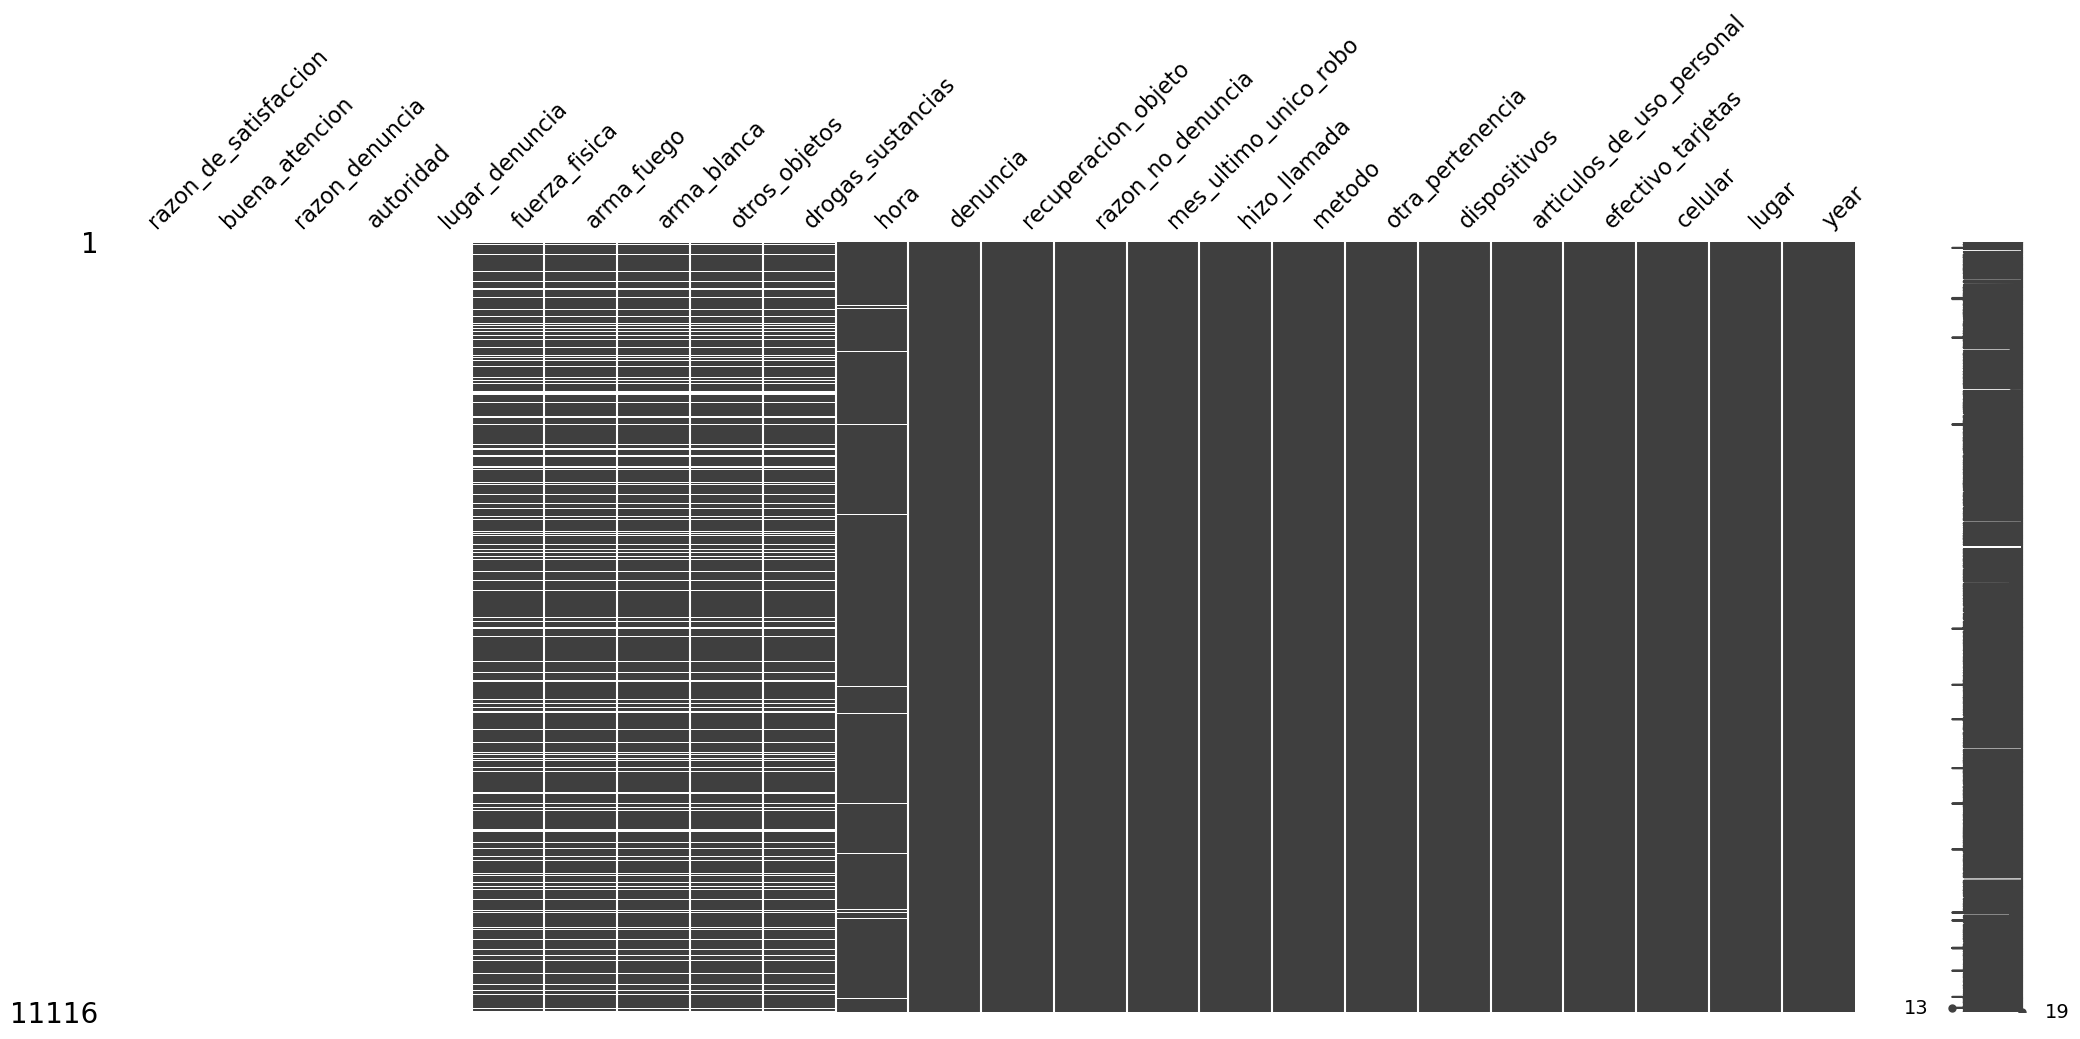

In [109]:
(
    df_no_denuncia
    .ms_tools.sort_variables_by_missingness()
    .sort_values(by='razon_denuncia')
    .pipe(missingno.matrix)
)

### valores nulos para las personas que si denunciaron

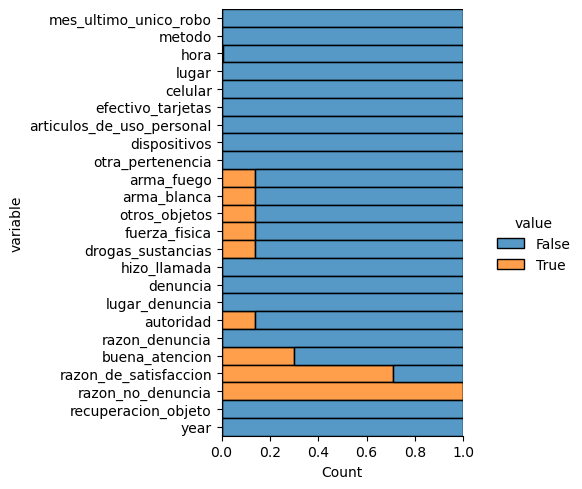

In [110]:
df_si_denuncia.ms_tools.vis_proportion()

<AxesSubplot: >

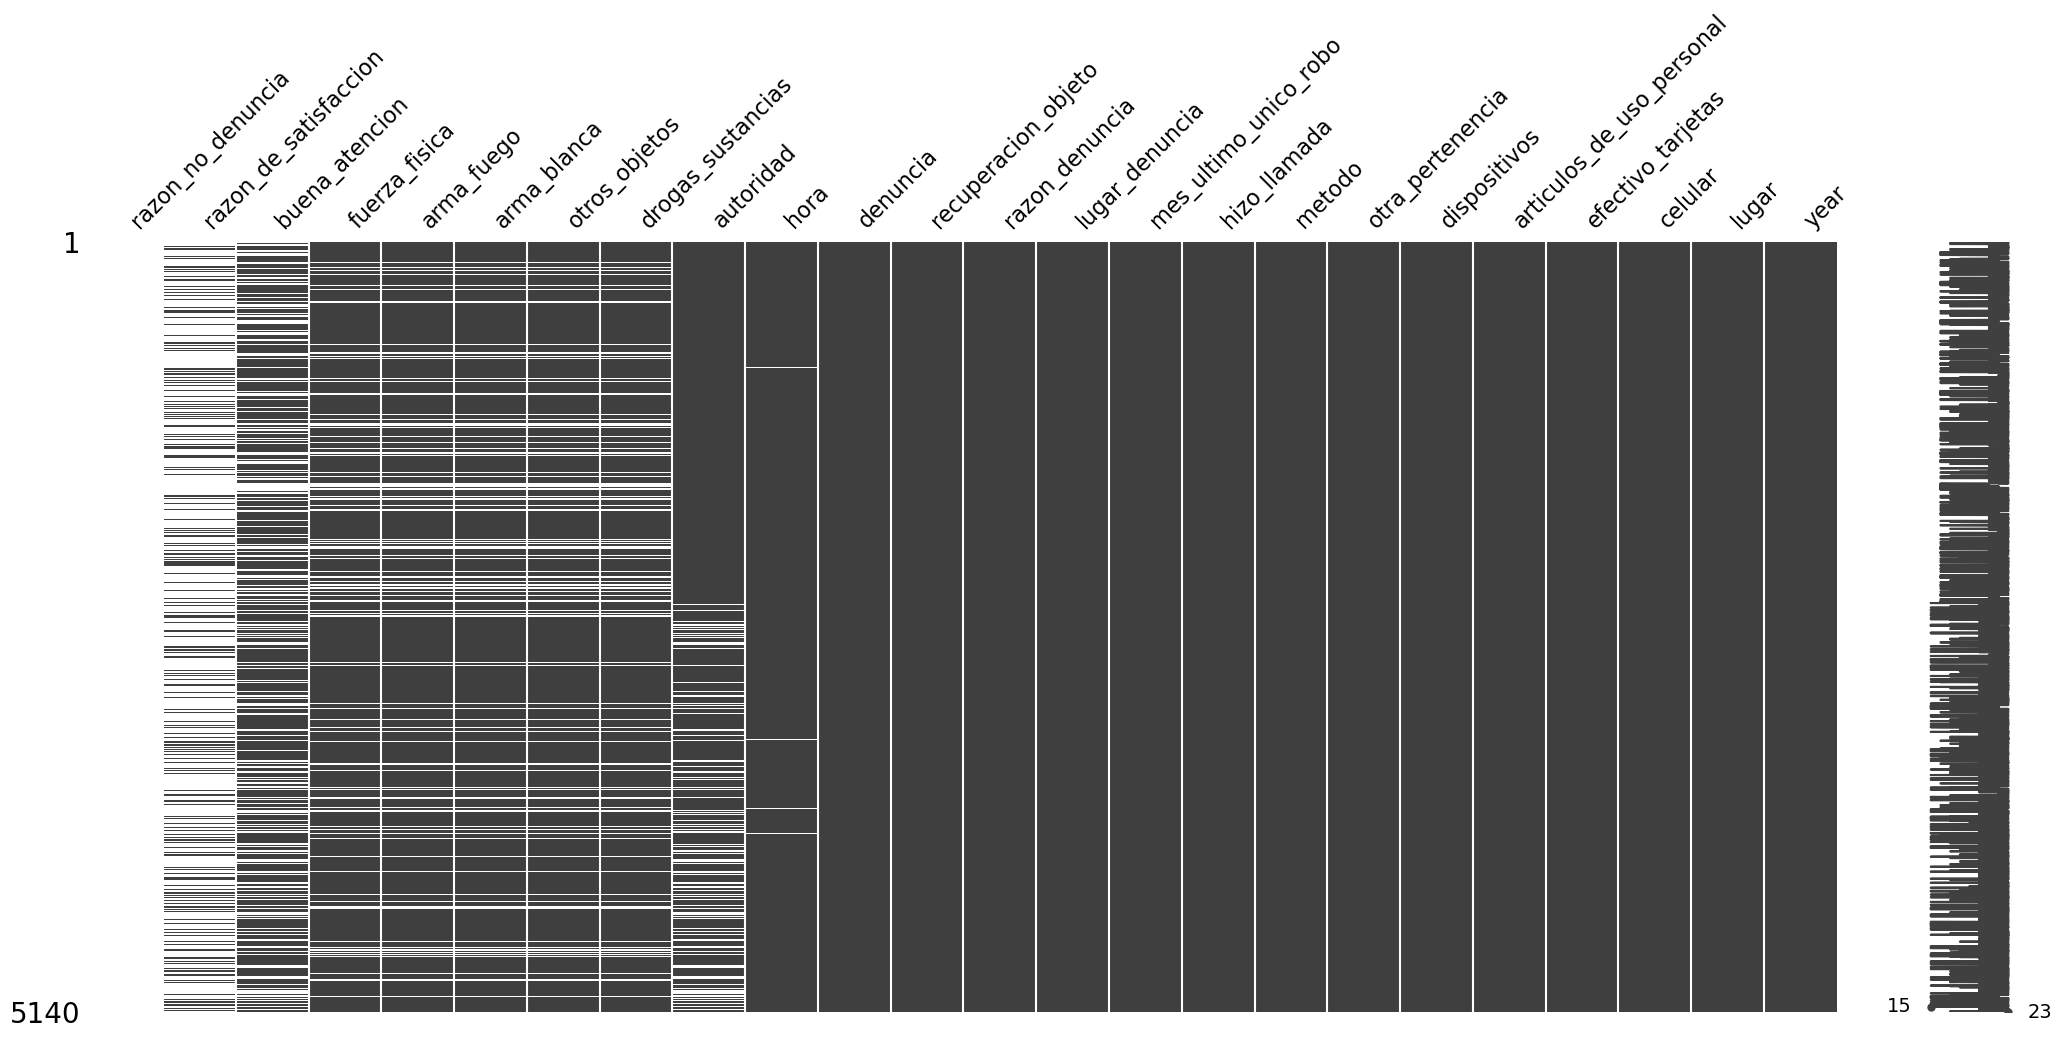

In [111]:
(
    df_si_denuncia
    .ms_tools.sort_variables_by_missingness()
    .sort_values(by='razon_no_denuncia')
    .pipe(missingno.matrix)
)

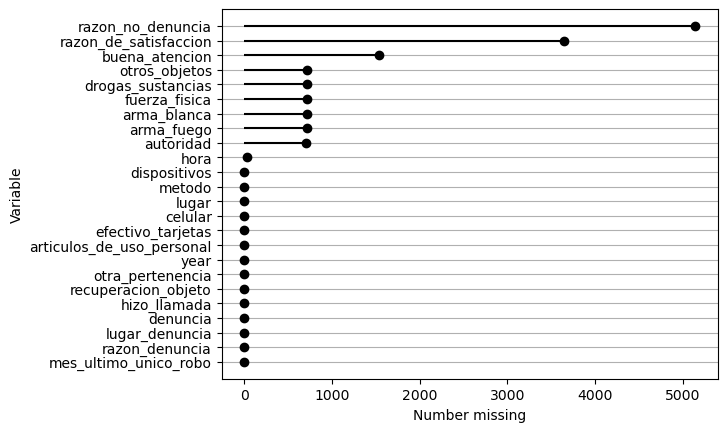

In [112]:
df_si_denuncia.ms_tools.vis_variable_plot()